In [1]:
import os
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

#### Functions to load Training Data and Testing Data

In [2]:
def load_training_data():
    f_image = open('data/train-images.idx3-ubyte', 'rb')
    f_label = open('data/train-labels.idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Training Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Training Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label


def load_testing_data():
    f_image = open('data/t10k-images.idx3-ubyte', 'rb')
    f_label = open('data/t10k-labels.idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Testing Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Testing Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label

#### Loading Training and Testing Data

In [3]:
train_image_data, train_image_label = load_training_data()
test_image_data, test_image_label = load_testing_data()

Training Image Data:
2051 60000 28 28
(47040000,) 

Training Image Label:
2049 60000
(60000,) 

Testing Image Data:
2051 10000 28 28
(7840000,) 

Testing Image Label:
2049 10000
(10000,) 



5


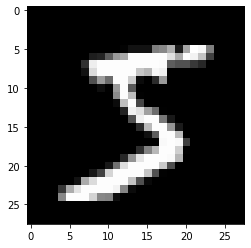

In [4]:
plt.imshow(train_image_data[0], cmap='gray');
print(train_image_label[0])

1


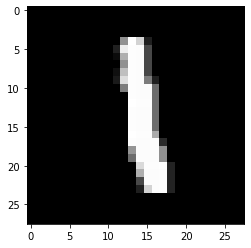

In [5]:
plt.imshow(train_image_data[6], cmap='gray');
print(train_image_label[6])

0


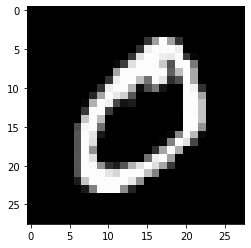

In [6]:
plt.imshow(train_image_data[1], cmap='gray');
print(train_image_label[1])

4


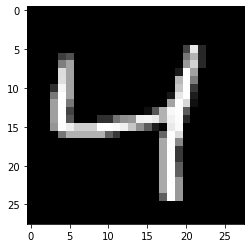

In [7]:
plt.imshow(train_image_data[2], cmap='gray');
print(train_image_label[2])

In [8]:
print(train_image_data.shape)
print(train_image_label.shape)
print(test_image_data.shape)
print(test_image_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
# Get all the label classes
pd.Series(train_image_label).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

## Running Neural networks on MNSIT Dataset

In [10]:
import numpy as np
import pandas as pd
from NeuralNetwork import NeuralNetwork
import warnings
warnings.filterwarnings("ignore")

In [11]:
n_classes = 10
n_samples, n_rows, n_cols = train_image_data.shape
n_features = n_rows * n_cols

In [12]:
x_train = pd.DataFrame(data=train_image_data.reshape((train_image_data.shape[0], n_rows*n_cols)))
x_test = pd.DataFrame(data=test_image_data.reshape((test_image_data.shape[0], n_rows*n_cols)))
y_train = np.eye(10)[train_image_label]
y_test = np.eye(10)[test_image_label]

In [18]:
nn = NeuralNetwork(N=4, neuronInEachLayers=[n_features,256,128,64,32,n_classes], lr=1e-5, 
                    activation='relu', weightInitType='normal', epochs=5, batchSize=128)

In [19]:
print(nn.weights_Θ[0].shape)
print(nn.weights_Θ[1].shape)
print(nn.weights_Θ[2].shape)
print(nn.weights_Θ[-1].shape)
print(nn.epochs)
print(nn.lr)
print(nn.activation)

(256, 785)
(128, 257)
(64, 129)
(10, 33)
5
1e-05


In [20]:
nn.fit(x_train, y_train)

0 1 2 3 4 

In [21]:
y_pred = nn.predict(x_test)
y_pred_proba = nn.predict_proba(x_test)

In [22]:
print(nn.score(x_train, y_train))
print(nn.score(x_test, y_test))

0.8782333333333333
0.877
